# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV" / "MWE" / "Capacitance"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
# paths.append( path_to_dataSetFolder / "CV_135307_ 3_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_140548_ 9_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_142109_ 8_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123313_ 1_MI")
paths.append( path_to_dataSetFolder / "CV_141031_ 3_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_141010_ 3_MI.tdms")
paths=list(path_to_dataSetFolder.glob("*.tdms"))
print(paths)
[print(x) for x in paths]



c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance
[WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123313_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123315_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123317_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123319_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123321_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123323_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123325_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/

[None, None, None, None, None, None, None, None, None, None]

## 3. Load in the data files

c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance\CV_123313_ 1_MI.tdms


(<matplotlib.lines.Line2D at 0x20713eb7d10>,
 <Axes: xlabel='Voltage (V)', ylabel='Current (A)'>)

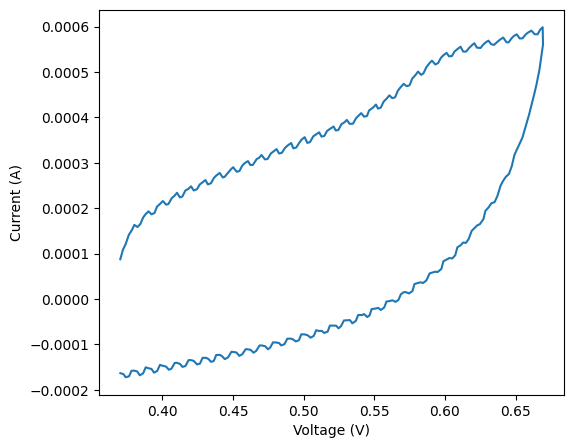

In [3]:
print(paths[0])
EC_Data(paths[0]).plot("E","i_4")

[<ec4py.util.Quantity_Value_Unit object at 0x0000020713EC10D0>, <ec4py.util.Quantity_Value_Unit object at 0x00000207170071D0>, <ec4py.util.Quantity_Value_Unit object at 0x0000020717015A90>, <ec4py.util.Quantity_Value_Unit object at 0x0000020717016690>, <ec4py.util.Quantity_Value_Unit object at 0x0000020717015B90>, <ec4py.util.Quantity_Value_Unit object at 0x000002071701E390>, <ec4py.util.Quantity_Value_Unit object at 0x000002071701F050>, <ec4py.util.Quantity_Value_Unit object at 0x0000020713E57B50>, <ec4py.util.Quantity_Value_Unit object at 0x00000207170A9D10>, <ec4py.util.Quantity_Value_Unit object at 0x0000020717016910>]


C:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\src\ec4py\cv_datas.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  CV_plot.legend()


<Axes: xlabel='E vs RHE (V)', ylabel='i v$^{-1}$ (A V/s$^{-1}$)'>

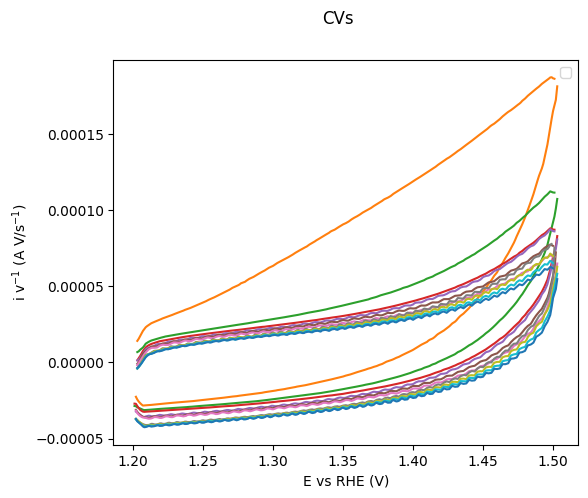

In [4]:
a=CV_Datas(paths,"i_3",y_smooth=5)
print(a.rate)
a.plot(RHE,RATE, LEGEND=RATE)

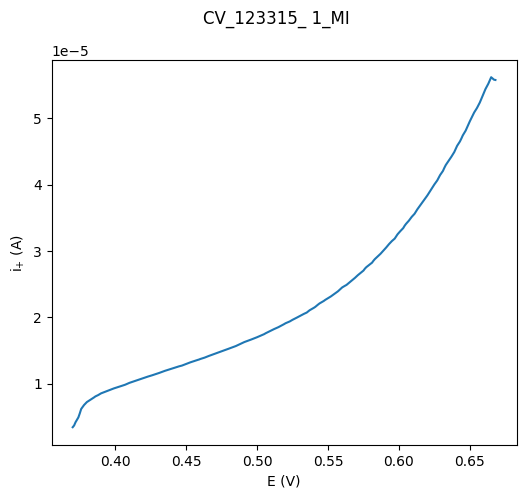

In [5]:
b=a[1].get_sweep(POS)
b.plot()

a[1].get_i_at_E(1.3,RHE)



In [6]:
k,i=a.get_i_at_E(0.5,RHE)
print(i)

[<ec4py.util.Quantity_Value_Unit object at 0x00000207192A7450>, <ec4py.util.Quantity_Value_Unit object at 0x00000207192A7950>, <ec4py.util.Quantity_Value_Unit object at 0x00000207192A60D0>, <ec4py.util.Quantity_Value_Unit object at 0x00000207192A4950>, <ec4py.util.Quantity_Value_Unit object at 0x00000207192A5E50>, <ec4py.util.Quantity_Value_Unit object at 0x00000207192A4290>, <ec4py.util.Quantity_Value_Unit object at 0x00000207192A5BD0>, <ec4py.util.Quantity_Value_Unit object at 0x0000020719284C90>, <ec4py.util.Quantity_Value_Unit object at 0x0000020719285A90>, <ec4py.util.Quantity_Value_Unit object at 0x0000020719284CD0>]


(<matplotlib.lines.Line2D at 0x2071927c3d0>,
 <Axes: xlabel='E vs RHE (V)', ylabel='i A$^{-1}$ (A m$^{-2}$)'>)

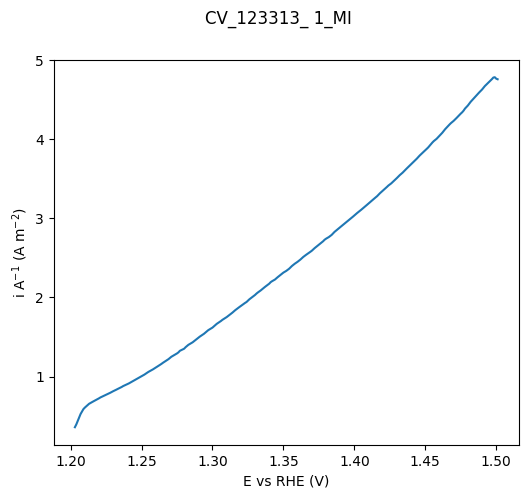

In [7]:
a[0].plot(NEG,RHE,AREA,dir=POS)

$v$ (V /s)
$v$ (V /s)
RanSev analysis
dir 	pos      	neg     
 :     	A / V^0.5 s^-0.5 	A / V^0.5
slope: 	3.43e-06 	9.46e-05


(<ec4py.util.Quantity_Value_Unit at 0x20719952090>,
 <ec4py.util.Quantity_Value_Unit at 0x20719955990>)

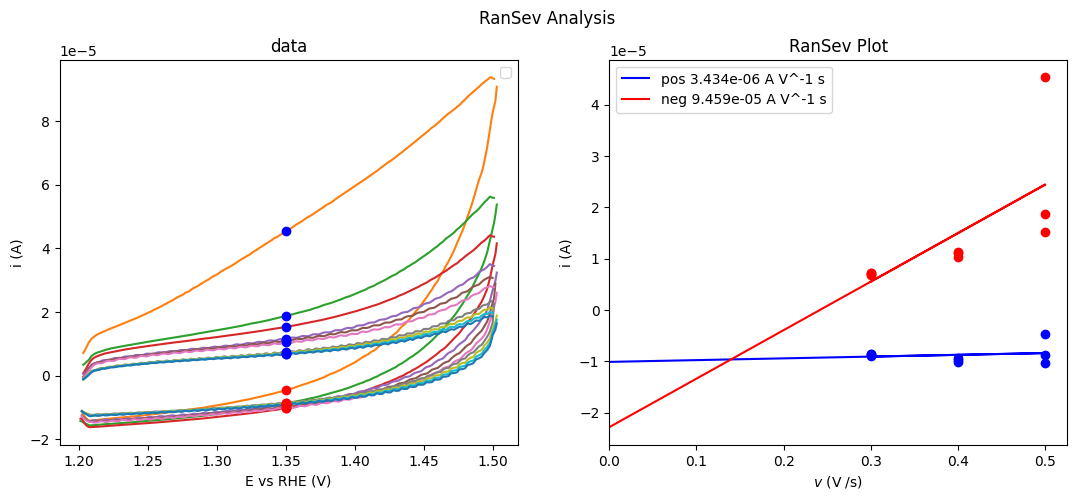

In [8]:
a.RanSev(1.35,NEG,RHE)